(advection:exercise)=
### Advection diffusion equation

**Task 4**: Solve the Advection-Diffusion equation, with the following initial and boundary conditions: at t=0 , 𝑐$_0$=0; for all subsequent times, 𝑐=0 at x=0, 𝑐=1 at 𝑥=𝐿=1, 𝑢=1.0 and K=0.1. Integrate over 0.05 s with a Δ𝑡=0.0028, and 40 grid points. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and analyse the results. Once you understand what is happening, set again Δ𝑡=0.0028 and gradually increase the wind speed. Discuss the results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 1       # Left BC
    bc_r  = 0       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial quantity field
    phi = np.zeros(Nx)
                 
    # Set boundary condiiton
    phi[Nx-1] = bc_r
    phi[0] = bc_l

    # Dimensionless parameters
    d = (K*dt)/(dx**2)
    c = (u*dt)/dx

    # Time loop
    t = 0

    while t <= integration:
        # Update flux
        phi[k] = (1-2*d)*phi[k] + (d-(c/2))*phi[kr] + (d+(c/2))*phi[kl]
        t = t + dt    
        
    return(phi, dx, u, K, c, d)




Dimensionless parameter c: 0.0112
Dimensionless parameter d: 0.0045


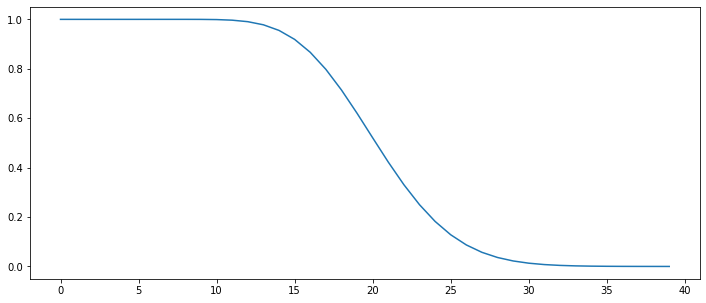

In [2]:
phi, dx, u, K, c, d = advection_diffusion(u=10.0, K=0.1, integration=0.05, dt=0.000028, Nx=40)

# Plot dimensionless parameters and plot data
print('Dimensionless parameter c: {:.4f}'.format(c))
print('Dimensionless parameter d: {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)

In [3]:
# Define the CFL criteria
CFL = 1.0

# Print required time steps according to the CFL criteria
print("required dt (advection) <= {:.4f} s".format((CFL * dx)/u))
print("required dt (diffusion) <= {:.4f} s".format(((CFL * dx**2))/(2*K)))
print('') 

required dt (advection) <= 0.0025 s
required dt (diffusion) <= 0.0031 s



**Task 5**: Solve the Advection-Diffusion equation, with the following initial impulse signal and boundary conditions: 

\begin{align}
c(n,0) &=exp^{\left(-\left(\frac{(x-10)}{2}\right)^2\right)} \\
c(0,t) &=0 \\
c(L,t) &=\frac{\partial c}{\partial x}=0
\end{align}

Integrate the equation with K=0.1, u=1.0 over 0.05 s with a Δ𝑡=0.0028. Plot the results and the dimensionless time scales. Increase gradually Δ𝑡 and plot and analyse the results for different integration times.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


def advection_diffusion(u, K, integration, dt, Nx):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nx          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = 1.                # Right border
    dx  = (b-a)/Nx          # Distance between grid points

    # Define the boundary conditions
    bc_l  = 0       # Left BC
    bc_r  = 0       # Right BC

    # Define index arrays 
    k   = np.arange(1,Nx-1)
    kr  = np.arange(2,Nx)
    kl  = np.arange(0,Nx-2)

    # Initial temperature field
    phi = np.exp(-(((np.arange(Nx))-10)/2)**2)
                 
    # Set boundary condiiton
    phi[Nx-1] = bc_r
    phi[0] = bc_l

    # Dimensionless parameters
    d = (K*dt)/(dx**2)
    c = (u*dt)/dx

    # Time loop
    t = 0
  
    while t <= integration:
        # Set BC
        phi[Nx-1] = phi[Nx-2]
        
        # Update flux
        phi[k] = (1-2*d)*phi[k] + (d-(c/2))*phi[kr] + (d+(c/2))*phi[kl]

        # Increate time
        t = t + dt    
        
    return(phi, dx, u, K, c, d)





required dt (advection) <= 0.0075 s
required dt (diffusion) <= 0.0031 s

Courant number (c): 0.1120 (C<1)
Characteristic diffusion time (d): 0.4480


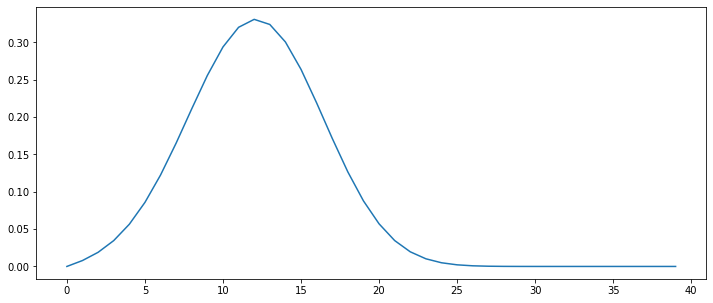

In [5]:
phi, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)

print("required dt (advection) <= {:.4f} s".format((0.3*dx)/u))
print("required dt (diffusion) <= {:.4f} s".format(((dx**2))/(2*K)))
print('')       
print('Courant number (c): {:.4f} (C<1)'.format(c))
print('Characteristic diffusion time (d): {:.4f}'.format(d))

plt.figure(figsize=(12,5))
plt.plot(phi)
plt.show()

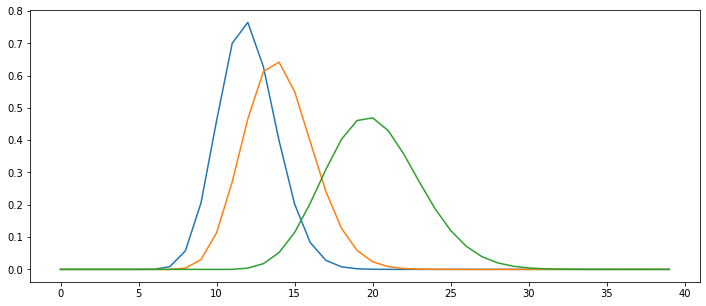

In [6]:
# Simulate evolution for different integration, e.g. 0.05, 0.1, 0.25
phi1, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.01, integration=0.05, dt=0.0028, Nx=40)
phi2, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.01, integration=0.1, dt=0.0028, Nx=40)
phi3, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.01, integration=0.25, dt=0.0028, Nx=40)


# Plot the results
plt.figure(figsize=(12,5))
plt.plot(phi1)
plt.plot(phi2)
plt.plot(phi3)
plt.show()

**Task 6**: Starting with the heat equation above simplify the equation to model the temperature evolution in the boundary layer from the surface up to H=2 km height. Assume a fair-weather condition with a subsidence of -0.001 m s-1. Also assume horizontal homogeneity. Parameterize the heat flux using the eddy-diffusivity closure with K=0.25 m s-2. Solve the simplified equation using the following initial and boundary conditions:

\begin{align}
\theta(z,0)=290~K \\
\overline{w'\theta'}(z,0)=0~W~m^{−2} \\
\theta(0,t)=290+10 \cdot sin\left(\frac{2\pi \cdot t}{86400}\right)~K \\
\theta(H,t)=\frac{\partial \theta}{\partial z}=0.01~K~m^{-1}
\end{align}

- What happens when you increase the subsidence to -0.01 m s$^{-1}$? 
- Plot the kinematic heat flux.
- What is the maximum heat flux in W m$^{-2}$? Is this a realistic values for a fair-weather condition?
- Calculate the heating rate in K per hour.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

def boundary_layer(w, K, integration, dt, Nz, H):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
    
    # Definitions and assignments
    a   = 0.                # Left border
    b   = H                 # Right border
    dz  = (b-a)/Nz          # Distance between grid points

    # Define the boundary conditions
    bc_t  = 0       # top BC
    bc_b  = 0       # bottom BC

    # Define index arrays 
    k   = np.arange(1,Nz-1)
    kr  = np.arange(2,Nz)
    kl  = np.arange(0,Nz-2)

    # Initial temperature field
    # CHANGE LINES HERE
    theta = 290 * np.ones(Nz)
    cov = np.zeros(Nz)
    adv = np.zeros(Nz)
    theta_all = np.zeros((Nz, int(integration/dt)))
    cov_all = np.zeros((Nz, int(integration/dt)))
    adv_all = np.zeros((Nz, int(integration/dt)))

    # Dimensionless parameters
    d = (K*dt)/(dz**2)
    c = (w*dt)/dz
    
    # Init time counter
    t = 0
    
    for idx in range(int(integration/dt)):
        
        # Set BC top
        # CHANGE LINES HERE
        theta[Nz-1] = theta[Nz-2] + 0.01*dz
        
        # Set BC surface
        # CHANGE LINES HERE
        theta[0] = 290 + 10.0 * np.sin((2*math.pi*t)/86400)
        
        # Update flux
        # CHANGE LINES HERE
        theta[k] = (1-2*d)*theta[k] + (d-(c/2))*theta[kr] + (d+(c/2))*theta[kl]
        theta_all[:,idx] = theta[:]
        adv[k] = -w * (theta[kr]-theta[kl])/(2*dz)
        adv_all[:,idx] = adv[:]
        
        # Calculate and store the covariance
        # CHANGE LINES HERE
        cov[k] = - K * (theta[kr]-theta[kl])/(2*dz)
        cov[0] = cov[1]
        cov_all[:,idx] = cov[:]
             
        # Increase time step
        t = t + dt
        
    return(adv_all, theta_all, cov_all, np.arange(0, integration, dt), np.arange(0, Nz*dz, dz), K, c, d)

phi, dx, u, K, c, d = advection_diffusion(u=1.0, K=0.1, integration=0.05, dt=0.0028, Nx=40)


In [8]:
def make_plot(data, x, z, levels, title, unit, xlab, zlab, cmap='RdBu_r'):
    """ Useful function for plotting 2D-fields as contour plot"""
    
    # Create figure
    fig, ax = plt.subplots(1,1,figsize=(18,5));
    cn0 = ax.contourf(x,z,data,10,origin='lower',levels=levels,cmap=cmap);
    
    # Add the colorbar and set ticks and labels
    cbar= fig.colorbar(cn0, ax=ax, orientation='vertical')
    cbar.set_label(label=unit, size=16)
    cbar.ax.tick_params(labelsize=14)
    
    # Add labels and modify ticks
    ax.set_xlabel(xlab, fontsize=14)
    ax.set_ylabel(zlab, fontsize=14)
    ax.set_title(title)
    
    # return the handler to the figure axes
    return ax



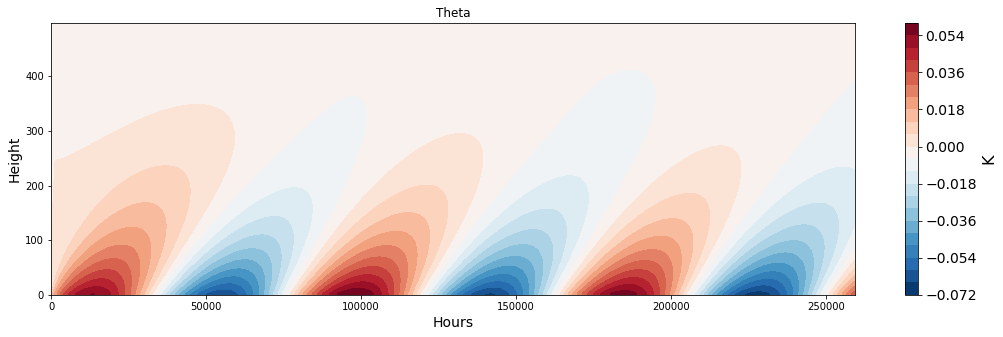

In [30]:
Nz = 200
H = 500
integration = 86400*3
dt = 1

# Run the boundary layer model
adv, phi1, cov, x, z, K, c, d = boundary_layer(w=-0.001, K=0.5, integration=integration, dt=dt, Nz=Nz, H=H)

# Create 2D mesh grid
ax = make_plot(adv+cov, x=x, z=z, levels=21, title='Theta', unit='K', xlab='Hours', zlab='Height', cmap='RdBu_r')

# Correct the ticks
#ax.set_xticks(x[x%(3600*6)==0]);
#ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

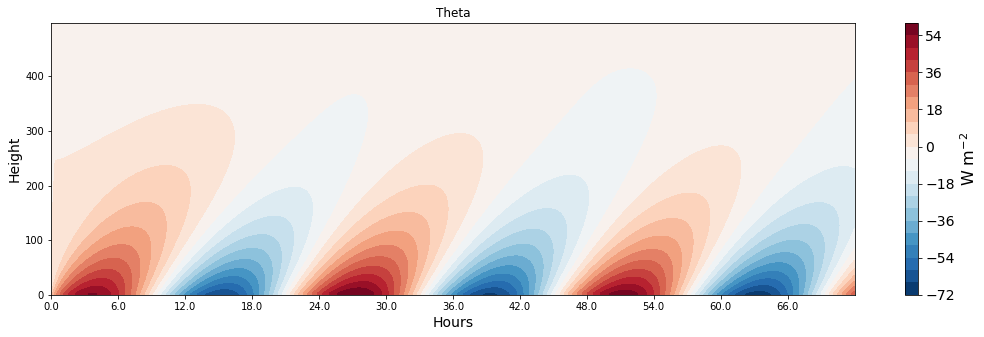

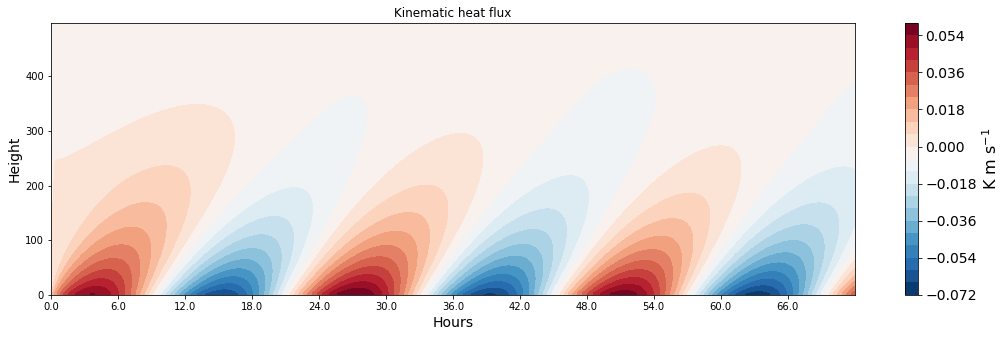

In [10]:
# Plot the heat fluxes

# Create 2D plot for the covariance
ax = make_plot(cov[:]*1004*1.0, x=x, z=z, levels=21, title='Theta', unit='W m$^{-2}$', xlab='Hours', zlab='Height', cmap='RdBu_r')
# Correct the ticks
ax.set_xticks(x[x%(3600*6)==0]);
ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

# Create 2D plot for the kinematic heat flux
ax = make_plot(cov[:], x=x, z=z, levels=21, title='Kinematic heat flux', unit='K m s$^{-1}$', xlab='Hours', zlab='Height', cmap='RdBu_r')
# Correct the ticks
ax.set_xticks(x[x%(3600*6)==0]);
ax.set_xticklabels(list(map(str,(x[x%(3600*6)==0]/3600))), size=10, weight='normal');

**Task 7**: Intense boundary layer convection may develop when cold air masses are advected over relatively warm surfaces. Develop a simple model for this by assuming that the time evolution of the boundary layer is determined by the vertical turbulent heat transport and the horizontal heat advection. Make the following assumptions: [Hint: use the eddy-diffusivity closure and the upwind scheme for the advection flux]

<img src="pics/lake_erie_exercise.png">

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

def boundary_layer_evolution(u, K, dx, dz, Nx, Nz, hours, dt):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
       
    # Some definitions
    # Multiply the hours given by the user by 3600 s to 
    # get the integration time in seconds
    integration = hours*3600
    
    # Define index arrays 
    # Since this a 2D problem we need to define two index arrays.
    # The first set of index arrays is used for indexing in x-direction. This
    # is needed to calculate the derivatives in x-direction (advection)
    k   = np.arange(1,Nx-1) # center cell
    kr  = np.arange(2,Nx)   # cells to the right
    kl  = np.arange(0,Nx-2) # cells to the left
    
    # The second set of index arrays is used for indexing in z-direction. This
    # is needed to calculate the derivates in z-direction (turbulent diffusion)
    m   = np.arange(1,Nz-1) # center cell
    mu  = np.arange(2,Nz)   # cells above 
    md  = np.arange(0,Nz-2) # cells below

    # Initial temperature field
    theta = 268 * np.ones((Nz, Nx)) # Temperature field is initialized with 268 K
    cov = np.zeros((Nz, Nx))        # Empty array for the covariances
    adv = np.zeros((Nz, Nx))        # Empty array for the advection term 
    
    # Define the boundary conditions
    # Set BC surface
    theta[0, :] = 268
    
    # The lower temperature boundary needs to be updated where there is the lake
    # Here, were set the temperature at the lower boundary from the grid cell 50
    # to 150 to a temperature of 278 K
    lake_from = 50
    lake_to = 150
    theta[0, lake_from:lake_to] = 278
    
    # Dimensionless parameters
    c = (u*dt)/dx
    d = (K*dt)/(dz**2)

    # Integrate the model
    for idx in range(int(integration/dt)):

        # Set BC top (Neumann condition)
        # The last term accounts for the fixed gradient of 0.01
        theta[Nz-1, :] = theta[Nz-2, :] + 0.01 * dz
        
        # Set BC right (Dirichlet condition)
        theta[:, Nx-1] = theta[:, Nx-2]
        
        # We need to keep track of the old values for calculating the new derivatives.
        # That means, the temperature value a grid cell is calculated from its values 
        # plus the correction term calculated from the old values. This guarantees that
        # the gradients for the x an z direction are based on the same old values.
        old = theta
            
        # First update grid cells in z-direction. Here, we loop over all x grid cells and
        # use the index arrays m, mu, md to calculate the gradients for the
        # turbulent diffusion (which only depends on z)
        for x in range(1,Nx-1):
            # temperature - turbulent diffusion
            theta[m,x] = theta[m,x] + ((K*dt)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])
            # Calculate the warming rate [K/s] by covariance
            cov[m,x] = ((K)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])

        # Then update grid cells in x-direction. Here, we loop over all z grid cells and
        # use the index arrays k, kl, kr to calculate the gradients for the
        # advection (which only depends on x)
        for z in range(1,Nz-1):
            # temperature advection
            theta[z,k] = theta[z,k] - ((u*dt)/(dx))*(old[z,k]-old[z,kl])
            # Calculate the warming rate [K/s] by the horizontal advection 
            # Note: Here, we use a so-called upwind-scheme (backward discretization)
            adv[z,k] = - (u/dx)*(old[z,k]-old[z,kl])

    # Return results    
    return theta, cov, adv, c, d, np.arange(0, Nx*dx, dx), np.arange(0, Nz*dz, dz)




In [51]:
# Run the model
theta, cov, adv, c, d, x, z = boundary_layer_evolution(u=5, K=0.02, dx=500, dz=5, Nx=250, Nz=20, hours=5, dt=75)

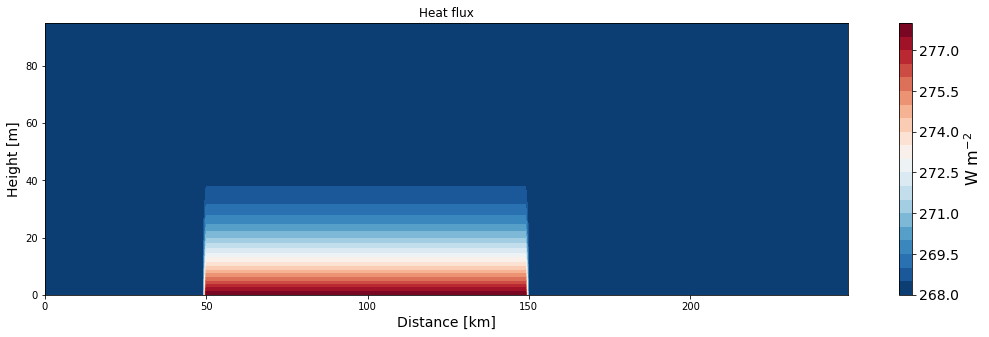

In [50]:
# Create 2D plot for the covariance
ax = make_plot(theta, x=x/500, z=z, levels=21, title='Heat flux', unit='W m$^{-2}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

Maximum warming rate by turbulent mixing: 24.41 K/h


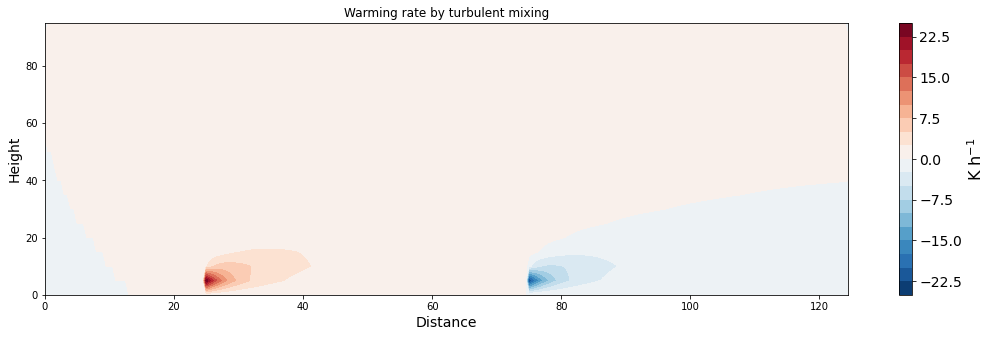

In [57]:
# Plot the warming rate by turbulent mixing
ax = make_plot(cov*3600, x=x/1000, z=z, levels=21, 
               title='Warming rate by turbulent mixing', 
               unit='K h$^{-1}$', 
               xlab='Distance', 
               zlab='Height', 
               cmap='RdBu_r')

print('Maximum warming rate by turbulent mixing: {:.2f} K/h'.format(np.max(cov*3600)))

Maximum warming rate by advection: 26.31 K/h


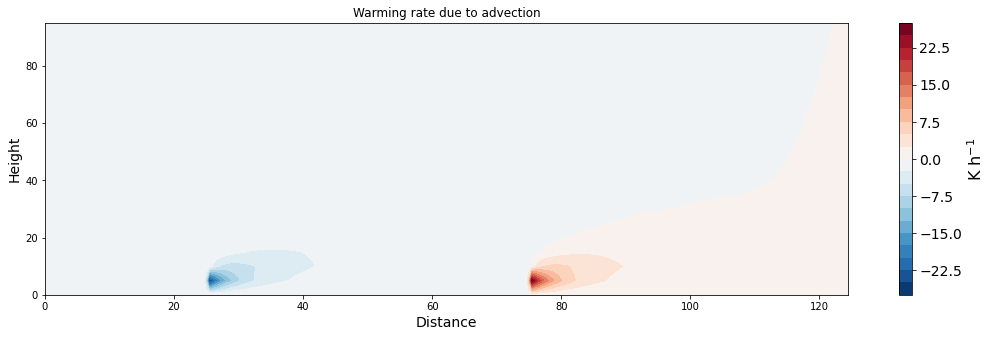

In [56]:
# Plot the warming rate by advection
ax = make_plot(adv*3600, x=x/1000, z=z, levels=21, 
               title='Warming rate due to advection', 
               unit='K h$^{-1}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')

print('Maximum warming rate by advection: {:.2f} K/h'.format(np.max(adv*3600)))

Maximum total warming rate : 17.48 K/h
Minimum total warming rate : -17.49 K/h


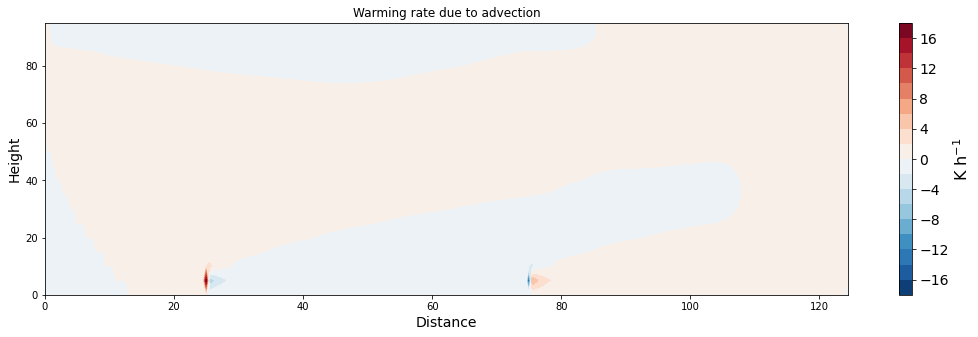

In [59]:
# Plot the total warming rate 
ax = make_plot((adv*3600)+(cov*3600), x=x/1000, z=z, levels=21, 
               title='Warming rate due to advection', 
               unit='K h$^{-1}$', 
               xlab='Distance', zlab='Height', cmap='RdBu_r')

print('Maximum total warming rate : {:.2f} K/h'.format(np.max((cov*3600)+(adv*3600))))
print('Minimum total warming rate : {:.2f} K/h'.format(np.min((cov*3600)+(adv*3600))))

**Task 8**: Extend the Lake-effect model by adding the moisture transport equation. Assume that the top millimetres above the water surface are saturated. Assume that the atmosphere has a relative humidity of 70 %. Calculate the relative humidity at each grid cell. [Note: Convert the potential temperature to normal temperature and calculate the mixing ratio at each cell. Then calculate the relative humidity.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
    
# --------------------------
# Auxiliary functions
# --------------------------
def saturation_water_vapor(T):
    """ Calculates the saturation water vapor pressure [Pa]"""
    # CHANGE LINES HERE
    return XXXXXX

def hypsometric_eqn(p0, Tv, z):
    """Hypsometric equation to calculate the pressure [hPa] at a certain height[m]
       when the surface pressure is given
       p0 :: surface pressure [hPa]
       Tv :: mean virtual temperature of atmosphere [K]
       z  :: height above ground [m]
    """
    # CHANGE LINES HERE
    return XXXXXX

def mixing_ratio(theta, p0, Tv, z):
    """ Calculates the mixing ratio from
        theta :: temperature [K]
        p0    :: surface pressure [hPa]
        Tv    :: mean virtual temperature of atmosphere [K]
        z     :: height [m]
    """
    # CHANGE LINES HERE
    return XXXXXX
           
    
    
    
def boundary_layer_evolution_moisture(u, K, dx, dz, Nx, Nz, hours, dt):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
       
    # Some definitions
    # Multiply the hours given by the user by 3600 s to 
    # get the integration time in seconds
    integration = hours*3600
    
    # Define index arrays 
    # Since this a 2D problem we need to define two index arrays.
    # The first set of index arrays is used for indexing in x-direction. This
    # is needed to calculate the derivatives in x-direction (advection)
    k   = np.arange(1,Nx-1) # center cell
    kr  = np.arange(2,Nx)   # cells to the right
    kl  = np.arange(0,Nx-2) # cells to the left
    
    # The second set of index arrays is used for indexing in z-direction. This
    # is needed to calculate the derivates in z-direction (turbulent diffusion)
    m   = np.arange(1,Nz-1) # center cell
    mu  = np.arange(2,Nz)   # cells above 
    md  = np.arange(0,Nz-2) # cells below

    # Make height grid
    height = np.array([np.arange(0,Nz*dz,dz),] * Nx).transpose()
    
    # Lake definition (grid points)
    lake_from = 50
    lake_to = 150
    
    # --------------------------
    # Initial temperature field
    # --------------------------
    # Neutral stratification with lapse rate of 0.01 K/m
    # Create a 1D-array with the vertical temperature distribution
    # Surface = 268 K, decreasing according to the dry-adiabative lapse rate 0.01 K/m
    lapse_rate = XXXXXX
    theta_vec = XXXXXX
    theta = XXXXXX
    
    # The lower temperature boundary needs to be updated where there is the lake
    # Here, were set the temperature at the lower boundary from the grid cell 50
    # to 150 to a temperature of 278 K
    theta[0, lake_from:lake_to] = 278
    
    # --------------------------
    # Initialize moisture fields 
    # --------------------------
    # Init saturation mixing ratio array
    qsat = XXXXXX
    
    # Use qsat to derive mixing ratio at each grid cell assuming a 
    # decreasing relative humidity from 70 % at the surfacee to 20 % at the top
    q = XXXXXX
    
    # The lower moisture boundary needs to be updated where there is the lake
    # Here, were set the moisture at the lower boundary from the grid cell 50
    # to 150 to a mixing ratio of 0.9 times the saturation mixing ratio
    q[0, lake_from:lake_to] = XXXXXX

    # --------------------------
    # Init other arrays
    # --------------------------
    cov = np.zeros((Nz, Nx))        # Empty array for the covariances
    adv = np.zeros((Nz, Nx))        # Empty array for the advection term 
    
    # --------------------------
    # Dimensionless parameters
    # --------------------------
    c = (u*dt)/dx
    d = (K*dt)/(dz**2)

    # --------------------------
    # Integrate the model
    # --------------------------
    for idx in range(int(integration/dt)):

        # Set BC top (Neumann condition)
        # The last term accounts for the fixed gradient of 0.01
        theta[Nz-1, :] = XXXXXX
        
        # Set top BC for moisture
        q[Nz-1, :] = q[Nz-2, :] 
        
        # Set BC right (Neumann condition)
        theta[:, Nx-1] = tXXXXXX
        
        # Set right BC for moisture
        q[:, Nx-1] = XXXXXX
        
        # We need to keep track of the old values for calculating the new derivatives.
        # That means, the temperature value a grid cell is calculated from its values 
        # plus the correction term calculated from the old values. This guarantees that
        # the gradients for the x an z direction are based on the same old values.
        old = theta
        old_q = q
            
        # First update grid cells in z-direction. Here, we loop over all x grid cells and
        # use the index arrays m, mu, md to calculate the gradients for the
        # turbulent diffusion (which only depends on z)
        for x in range(1,Nx-1):
            # Update temperature including lapse rate 
            theta[m,x] = theta[m,x] + ((K*dt)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x]) + lapse_rate
            # Moisture transport (turbulent diffusion)
            # CHANGE LINES HERE
            q[m,x] = XXXXXX
            # Calculate the warming rate [K/s] by covariance
            cov[m,x] = ((K)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])

        # Then update grid cells in x-direction. Here, we loop over all z grid cells and
        # use the index arrays k, kl, kr to calculate the gradients for the
        # advection (which only depends on x)
        for z in range(1,Nz-1):
            # temperature advection
            theta[z,k] = theta[z,k] - ((u*dt)/(dx))*(old[z,k]-old[z,kl])
            # moisture advection
            # CHANGE LINES HERE
            q[z,k] = XXXXXX
            # Calculate the warming rate [K/s] by the horizontal advection 
            # Note: Here, we use a so-called upwind-scheme (backward discretization)
            adv[z,k] = - (u/dx)*(old[z,k]-old[z,kl])
            
        # Calculate new saturation mixing ratio
        # CHANGE LINES HERE
        qsat = XXXXXX
        
        # Then the relative humidity using qsat
        # Limit the relative humidity to 100 %
        # CHANGE LINES HERE
        rH = np.minimum(XXXXXX, 1)
        
    # Return results    
    return theta, q, qsat, rH, cov, adv, c, d, np.arange(0, Nx*dx, dx), np.arange(0, Nz*dz, dz)



In [ ]:
height = np.array([np.arange(0,10*5,5),] * 10).transpose()
print(height)

In [ ]:
# Run the model
theta, q, qsat, rH, cov, adv, c, d, x, z = boundary_layer_evolution_moisture(u=5, K=0.2, dx=500, dz=10, 
                                                                       Nx=250, Nz=40, hours=24, dt=60)

In [ ]:
# Create 2D plot for the covariance
ax = make_plot(theta, x=x/1000, z=z, levels=11, title='Temperature', unit='K', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

# Create 2D plot for the covariance
ax = make_plot(q, x=x/1000, z=z, levels=11, title='Mixing ratio', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

# Create 2D plot for the covariance
ax = make_plot(qsat, x=x/1000, z=z, levels=11, title='Saturation mixing ratio', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

# Create 2D plot for the covariance
ax = make_plot(rH*100, x=x/1000, z=z, levels=11, title='Relative humidity', unit='%', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

ax.contour(x/1000, z,rH,levels=[0.95,1.0],colors='red');

In [ ]:
# Base run
theta0, q0, qsat0, rH0, cov0, adv0, c0, d0, x0, z0 = boundary_layer_evolution_moisture(u=5, K=0.2, dx=500, dz=10, 
                                                                       Nx=250, Nz=40, hours=0.1, dt=60)

In [ ]:
# Create 2D plot for the covariance
ax = make_plot(theta-theta0, x=x/1000, z=z, levels=11, title='Temperature difference', unit='K', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

# Create 2D plot for the covariance
ax = make_plot(q-q0, x=x/1000, z=z, levels=11, title='Mixing ratio difference', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

# Create 2D plot for the covariance
ax = make_plot(qsat-qsat0, x=x/1000, z=z, levels=11, title='Saturation mixing ratio difference', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

# Create 2D plot for the covariance
ax = make_plot((rH-rH0)*100, x=x/1000, z=z, levels=11, title='Relative humidity difference', unit='%', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

ax.contour(x/1000, z,rH,levels=[0.95,1.0],colors='lightgreen');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
    
# --------------------------
# Auxiliary functions
# --------------------------
def saturation_water_vapor(T):
    """ Calculates the saturation water vapor pressure [Pa]"""
    return ( 6.122*np.exp( (17.67*(T-273.16))/(T-29.66) ) )

def hypsometric_eqn(p0, Tv, z):
    """Hypsometric equation to calculate the pressure at a certain height 
       when the surface pressure is given
       p0 :: surface pressure [hPa]
       Tv :: mean virtual temperature of atmosphere [K]
       z  :: height above ground [m]
    """
    return(p0/(np.exp((9.81*z)/(287.4*Tv) )))

def mixing_ratio(theta, p0, Tv, z):
    """ Calculates the mixing ratio from
        theta :: temperature [K]
        p0    :: surface pressure [hPa]
        Tv    :: mean virtual temperature of atmosphere [K]
        z     :: height [m]
    """
    return(622.97 * (saturation_water_vapor(theta)/(hypsometric_eqn(p0,Tv,z)-saturation_water_vapor(theta))))
           
    
    
    
def boundary_layer_evolution_moisture_gamma(u, K, dx, dz, Nx, Nz, hours, dt):
    """ Simple advection-diffusion equation.
    
    integration :: Integration time in seconds
    Nz          :: Number of grid points
    dt          :: time step in seconds
    K           :: turbulent diffusivity
    u           :: Speed of fluid
    """
       
    # Some definitions
    # Multiply the hours given by the user by 3600 s to 
    # get the integration time in seconds
    integration = hours*3600
    
    # Define index arrays 
    # Since this a 2D problem we need to define two index arrays.
    # The first set of index arrays is used for indexing in x-direction. This
    # is needed to calculate the derivatives in x-direction (advection)
    k   = np.arange(1,Nx-1) # center cell
    kr  = np.arange(2,Nx)   # cells to the right
    kl  = np.arange(0,Nx-2) # cells to the left
    
    # The second set of index arrays is used for indexing in z-direction. This
    # is needed to calculate the derivates in z-direction (turbulent diffusion)
    m   = np.arange(1,Nz-1) # center cell
    mu  = np.arange(2,Nz)   # cells above 
    md  = np.arange(0,Nz-2) # cells below

    # Make height grid
    height = np.array([np.arange(0,Nz*dz,dz),] * Nx).transpose()
    
    # Make lapse rate array
    Gamma = -0.01 * np.ones((Nz, Nx))
    
    # Lake definition (grid points)
    lake_from = 50
    lake_to = 150
    
    # --------------------------
    # Initial temperature field
    # --------------------------
    # Neutral stratification with lapse rate of 0.01 K/m
    # Create a 1D-array with the vertical temperature distribution
    # Surface = 268 K, decreasing according to the dry-adiabative lapse rate 0.01 K/m
    lapse_rate = -0.01
    theta_vec = np.array([268 + lapse_rate * (dz * z) for z in range(Nz)])
    theta = np.array([theta_vec,] * Nx).transpose() 
    
    # The lower temperature boundary needs to be updated where there is the lake
    # Here, were set the temperature at the lower boundary from the grid cell 50
    # to 150 to a temperature of 278 K
    theta[0, lake_from:lake_to] = 278
    
    # --------------------------
    # Initialize moisture fields 
    # --------------------------
    # Init moisture array with a relative humidity of 70 %
    qsat = mixing_ratio(theta, 1013, 270, height)
    
    # Multiply with relative humidity (80 %)
    q = (qsat.T * np.linspace(0.7, 0.2, Nz)).T
    
    
    # The lower moisture boundary needs to be updated where there is the lake
    # Here, were set the moisture at the lower boundary from the grid cell 50
    # to 150 to a mixing ratio of 0.9 times the saturation mixing ratio
    q[0, lake_from:lake_to] = 0.9 * qsat[0, lake_from:lake_to] 

    # --------------------------
    # Init other arrays
    # --------------------------
    cov = np.zeros((Nz, Nx))        # Empty array for the covariances
    adv = np.zeros((Nz, Nx))        # Empty array for the advection term 
    
    # --------------------------
    # Dimensionless parameters
    # --------------------------
    c = (u*dt)/dx
    d = (K*dt)/(dz**2)

    # --------------------------
    # Integrate the model
    # --------------------------
    for idx in range(int(integration/dt)):

        # Set BC top (Neumann condition)
        # The last term accounts for the fixed gradient of 0.01
        theta[Nz-1, :] = theta[Nz-2, :]# - 0.005 * dz
        
        # Set top BC for moisture
        q[Nz-1, :] = q[Nz-2, :] 
        
        # Set BC right (Dirichlet condition)
        theta[:, Nx-1] = theta[:, Nx-2]
        
        # Set right BC for moisture
        q[:, Nx-1] = q[:, Nx-2]
        
        # We need to keep track of the old values for calculating the new derivatives.
        # That means, the temperature value a grid cell is calculated from its values 
        # plus the correction term calculated from the old values. This guarantees that
        # the gradients for the x an z direction are based on the same old values.
        old = theta
        old_q = q
            
        # First update grid cells in z-direction. Here, we loop over all x grid cells and
        # use the index arrays m, mu, md to calculate the gradients for the
        # turbulent diffusion (which only depends on z)
        for x in range(1,Nx-1):
            # Temperature diffusion + lapse rate 
            theta[m,x] = theta[m,x] + ((K*dt)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x]) + Gamma[m,x]
            # Turbulent diffusion of moisture
            q[m,x] = q[m,x] + ((K*dt)/(dz**2))*(old_q[mu,x]+old_q[md,x]-2*old_q[m,x])
            # Calculate the warming rate [K/s] by covariance
            cov[m,x] = ((K)/(dz**2))*(old[mu,x]+old[md,x]-2*old[m,x])

        # Then update grid cells in x-direction. Here, we loop over all z grid cells and
        # use the index arrays k, kl, kr to calculate the gradients for the
        # advection (which only depends on x)
        for z in range(1,Nz-1):
            # temperature advection
            theta[z,k] = theta[z,k] - ((u*dt)/(dx))*(old[z,k]-old[z,kl])
            # moisture advection
            q[z,k] = q[z,k] - ((u*dt)/(dx))*(old_q[z,k]-old_q[z,kl])
            # Calculate the warming rate [K/s] by the horizontal advection 
            # Note: Here, we use a so-called upwind-scheme (backward discretization)
            adv[z,k] = - (u/dx)*(old[z,k]-old[z,kl])
            
        # Calculate new saturation mixing ratio
        qsat = mixing_ratio(theta, 1013, 270, height)
        
        # Then the relative humidity using qsat
        rH = np.minimum(q/qsat, 1)
        
        # Correct lapse rates where rH==100% (moist adiabatic lapse rate)
        Gamma[rH==1] = -0.006
        
    # Return results    
    return theta, q, qsat, rH, cov, adv, c, d, np.arange(0, Nx*dx, dx), np.arange(0, Nz*dz, dz)





In [ ]:
# Base run
theta0, q0, qsat0, rH0, cov0, adv0, c0, d0, x0, z0 = boundary_layer_evolution_moisture_gamma(u=5, K=0.2, 
                                                                    dx=500, dz=10, 
                                                                    Nx=250, Nz=40, hours=24, dt=60)

In [ ]:
# Create 2D plot for the covariance
ax = make_plot(theta, x=x/1000, z=z, levels=11, title='Temperature', unit='K', 
               xlab='Distance [km]', zlab='Height [m]', cmap='RdBu_r')

# Create 2D plot for the covariance
ax = make_plot(q, x=x/1000, z=z, levels=11, title='Mixing ratio', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

# Create 2D plot for the covariance
ax = make_plot(qsat, x=x/1000, z=z, levels=11, title='Saturation mixing ratio', unit='g kg$^{-1}$', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

# Create 2D plot for the covariance
ax = make_plot(rH*100, x=x/1000, z=z, levels=11, title='Relative humidity', unit='%', 
               xlab='Distance [km]', zlab='Height [m]', cmap='YlGnBu')

ax.contour(x/1000, z,rH,levels=[0.95,1.0],colors='red')